In [1]:
import django_initializer
from telemetry.fast_lap_analyzer import FastLapAnalyzer
from telemetry.racing_stats import RacingStats
from telemetry.models import FastLap, Lap
from telemetry.analyzer import Analyzer
from telemetry.influx import Influx
import plotly.io as pio

pio.renderers.default = "svg"  # comment this line to use interactive plots

import pandas as pd
import numpy as np

from telemetry.visualizer import *

%load_ext autoreload
%autoreload 2

analyzer = Analyzer()
influx = Influx()
fast_lap_analyzer = FastLapAnalyzer()
racing_stats = RacingStats()

2023-12-30 15:31:29,622 DEBUG Influx: Connected to https://telemetry.b4mad.racing:443/


In [2]:
kwargs = {
    "game__name": "Richard Burns Rally",
    "track__name": "East-West",
    "car__name": "Mitsubishi Lancer Evo X R4",
}
lap_id = 696976
laps = []
if lap_id:
    lap = Lap.objects.get(pk=lap_id)
    laps.append(lap)
else:
    laps = racing_stats.laps(**kwargs)
    laps = laps[:10]
# laps = list(laps)
fast_lap_analyzer.laps = laps
data_frames, laps_with_telemetry = fast_lap_analyzer.fetch_lap_telemetry()

2023-12-30 15:31:30,378 DEBUG Influx: Connected to https://telemetry.b4mad.racing:443/
2023-12-30 15:31:30,517 INFO Fetching telemetry for Richard Burns Rally - East-West - Mitsubishi Lancer Evo X R4
2023-12-30 15:31:30,518 INFO   track.id 3262 car.id 4034
2023-12-30 15:31:30,518 INFO   session 1703765558 lap.id 696976 number 0
2023-12-30 15:31:30,518 INFO   length 9908 time 519.9802 valid True
2023-12-30 15:31:30,519 INFO   start 2023-12-28 13:12:38.380911+00:00 end 2023-12-28 13:22:18.361111+00:00
2023-12-30 15:31:30,559 ERROR No data found for 1703765558 lap 0
2023-12-30 15:31:30,560 INFO No data found for lap in fast_laps bucket, trying in default bucket
2023-12-30 15:31:30,560 INFO Fetching telemetry for Richard Burns Rally - East-West - Mitsubishi Lancer Evo X R4
2023-12-30 15:31:30,560 INFO   track.id 3262 car.id 4034
2023-12-30 15:31:30,560 INFO   session 1703765558 lap.id 696976 number 0
2023-12-30 15:31:30,561 INFO   length 9908 time 519.9802 valid True
2023-12-30 15:31:30,56

In [3]:
# influx_data_frames = []
# for df in data_frames:
#     influx_data_frames.append(df.copy())

# data_frames = []
# for df in influx_data_frames:
#     data_frames.append(df.copy())

In [4]:
current_sectors = fast_lap_analyzer.current_fast_lap_sectors()
display(current_sectors)

[{'start': 296, 'end': 482},
 {'start': 483, 'end': 580},
 {'start': 581, 'end': 645},
 {'start': 646, 'end': 824},
 {'start': 825, 'end': 924},
 {'start': 925, 'end': 1092},
 {'start': 1093, 'end': 1212},
 {'start': 1213, 'end': 1481},
 {'start': 1482, 'end': 1773},
 {'start': 1774, 'end': 1920},
 {'start': 1921, 'end': 2100},
 {'start': 2101, 'end': 2251},
 {'start': 2252, 'end': 2347},
 {'start': 2348, 'end': 2590},
 {'start': 2591, 'end': 2791},
 {'start': 2792, 'end': 2957},
 {'start': 2958, 'end': 3205},
 {'start': 3206, 'end': 3331},
 {'start': 3332, 'end': 3410},
 {'start': 3411, 'end': 3565},
 {'start': 3566, 'end': 3806},
 {'start': 3807, 'end': 3911},
 {'start': 3912, 'end': 4050},
 {'start': 4051, 'end': 4166},
 {'start': 4167, 'end': 4352},
 {'start': 4353, 'end': 4584},
 {'start': 4585, 'end': 4681},
 {'start': 4682, 'end': 4938},
 {'start': 4939, 'end': 5091},
 {'start': 5092, 'end': 5239},
 {'start': 5240, 'end': 5385},
 {'start': 5386, 'end': 5432},
 {'start': 5433, 'e

2023-12-30 15:31:32,321 DEBUG split_sectors: min_length_throttle_below_threshold: 20
2023-12-30 15:31:32,322 DEBUG split_sectors: min_distance_between_sectors: 35
2023-12-30 15:31:32,324 DEBUG sector 23 - 2753m too short: 2.0
2023-12-30 15:31:32,324 DEBUG sector 24 - 2784m too short: 16.0
2023-12-30 15:31:32,324 DEBUG sector 34 - 3805m too short: 7.0
2023-12-30 15:31:32,325 DEBUG sector 35 - 3827m too short: 6.0
2023-12-30 15:31:32,325 DEBUG sector 39 - 4114m too short: 15.0
2023-12-30 15:31:32,325 DEBUG sector 47 - 4732m too short: 14.0
2023-12-30 15:31:32,325 DEBUG sector 48 - 4753m too short: 17.0
2023-12-30 15:31:32,326 DEBUG sector 52 - 5062m too short: 15.0
2023-12-30 15:31:32,326 DEBUG sector 54 - 5208m too short: 3.0
2023-12-30 15:31:32,326 DEBUG sector 55 - 5220m too short: 5.0
2023-12-30 15:31:32,326 DEBUG sector 58 - 5505m too short: 17.0
2023-12-30 15:31:32,326 DEBUG sector 67 - 6575m too short: 3.0
2023-12-30 15:31:32,327 DEBUG sector 70 - 6841m too short: 14.0
2023-12-30 

[{'start': 0, 'end': 94.0, 'length': 94},
 {'start': 95.0, 'end': 290.0, 'length': 195},
 {'start': 291, 'end': 867.0, 'length': 576},
 {'start': 868.0, 'end': 1103.0, 'length': 235},
 {'start': 1104, 'end': 1191.0, 'length': 87},
 {'start': 1192.0, 'end': 1519.0, 'length': 327},
 {'start': 1520, 'end': 1813.0, 'length': 293},
 {'start': 1814, 'end': 1920.0, 'length': 106},
 {'start': 1921, 'end': 2329.0, 'length': 408},
 {'start': 2330.0, 'end': 2573.0, 'length': 243},
 {'start': 2574.0, 'end': 2779.0, 'length': 205},
 {'start': 2780.0, 'end': 3009.0, 'length': 229},
 {'start': 3010, 'end': 3383.0, 'length': 373},
 {'start': 3384, 'end': 3546.0, 'length': 162},
 {'start': 3547, 'end': 3817.0, 'length': 270},
 {'start': 3818, 'end': 3908.0, 'length': 90},
 {'start': 3909, 'end': 4150.0, 'length': 241},
 {'start': 4151.0, 'end': 4681.0, 'length': 530},
 {'start': 4682.0, 'end': 4926.0, 'length': 244},
 {'start': 4927, 'end': 5089.0, 'length': 162},
 {'start': 5090, 'end': 5241.0, 'lengt

'Sectors are similar: False'

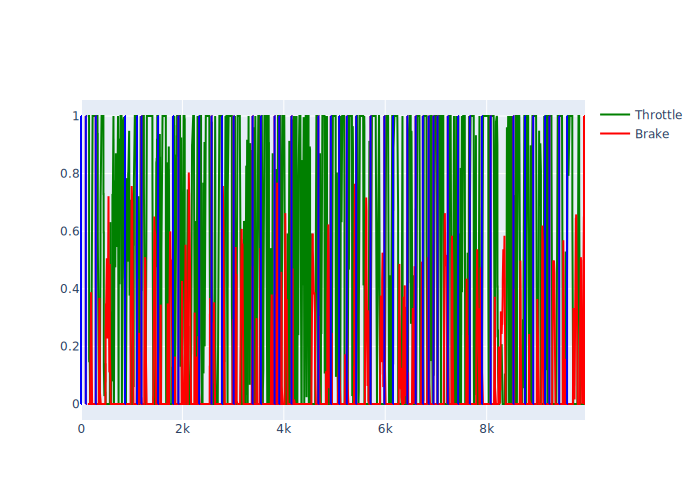

In [5]:
# for i, df in enumerate(data_frames):
#     fig = lap_fig(df, full_range=True, columns=["Throttle"])
#     fig.show()
sector_start_end, df_max = fast_lap_analyzer.extract_sectors(data_frames)
display(sector_start_end)

# are the sectors similar to the current fast lap?
similarity = fast_lap_analyzer.similar_sectors(sector_start_end, current_sectors)
display(f"Sectors are similar: {similarity}")

fig = lap_fig(df_max, full_range=True, columns=["Throttle", "Brake"])
# add a vertical line for each sector
for i, sector in enumerate(sector_start_end):
    fig_add_shape(fig, x0=sector["start"], x1=sector["start"], color="blue")
    fig_add_shape(fig, x0=sector["end"], x1=sector["end"], color="red")
fig.show()

2023-12-30 15:31:33,815 DEBUG extract_segments for sector 0 start: 0 end: 94.0
2023-12-30 15:31:33,817 ERROR sector 0 is empty
2023-12-30 15:31:33,818 ERROR Could not find fastest sector for 0 - 94.0
2023-12-30 15:31:33,818 DEBUG extract_segments for sector 1 start: 95.0 end: 290.0
2023-12-30 15:31:33,820 DEBUG get sector for lap 0: min: 134.0 != start: 95.0
2023-12-30 15:31:33,820 ERROR Could not find fastest sector for 95.0 - 290.0
2023-12-30 15:31:33,821 DEBUG extract_segments for sector 2 start: 291 end: 867.0
2023-12-30 15:31:33,836 DEBUG extract_segments for sector 3 start: 868.0 end: 1103.0
2023-12-30 15:31:33,843 DEBUG extract_segments for sector 4 start: 1104 end: 1191.0
2023-12-30 15:31:33,851 DEBUG extract_segments for sector 5 start: 1192.0 end: 1519.0
2023-12-30 15:31:33,860 DEBUG extract_segments for sector 6 start: 1520 end: 1813.0
2023-12-30 15:31:33,867 DEBUG extract_segments for sector 7 start: 1814 end: 1920.0
2023-12-30 15:31:33,874 DEBUG extract_segments for sector

'time: 28.3706599 291 -> 867 / track: 9920.0'

"brake: {'start': 355.0, 'end': 371.77, 'max_start': 361.9, 'max_end': 367.82, 'max_high': 0.37, 'max_low': 0.34, 'force': 0.35, 'approach_speed': 30.73, 'min_speed': 28.74}"

"throttle: {'start': 326.39, 'end': 401.37, 'max_start': 338.22, 'max_end': 374.73, 'max_high': 0.07, 'max_low': 0.0, 'force': 0.01, 'approach_speed': 33.38, 'min_speed': 28.74}"

"gear: {'gear': 2, 'distance_gear': {292: 4, 303: 5, 455: 6, 508: 5, 527: 4, 548: 3, 601: 2, 691: 3, 735: 4, 850: 5}}"

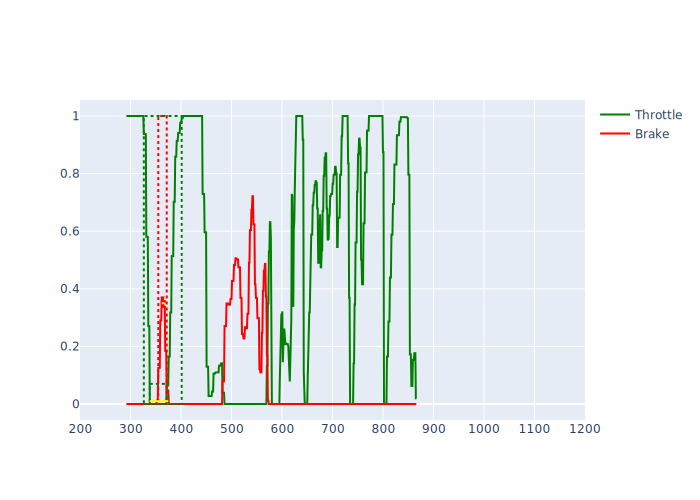

'time: 8.273040700000003 868 -> 1103 / track: 9920.0'

"brake: {'start': 979.51, 'end': 1019.96, 'max_start': 986.41, 'max_end': 1014.04, 'max_high': 0.76, 'max_low': 0.6, 'force': 0.7, 'approach_speed': 32.12, 'min_speed': 18.52}"

"throttle: {'start': 868.02, 'end': 1048.57, 'max_start': 868.02, 'max_end': 1037.72, 'max_high': 0.08, 'max_low': 0.0, 'force': 0.01, 'approach_speed': 29.71, 'min_speed': 18.52}"

"gear: {'gear': 4, 'distance_gear': {868: 5, 1015: 4, 1089: 5}}"

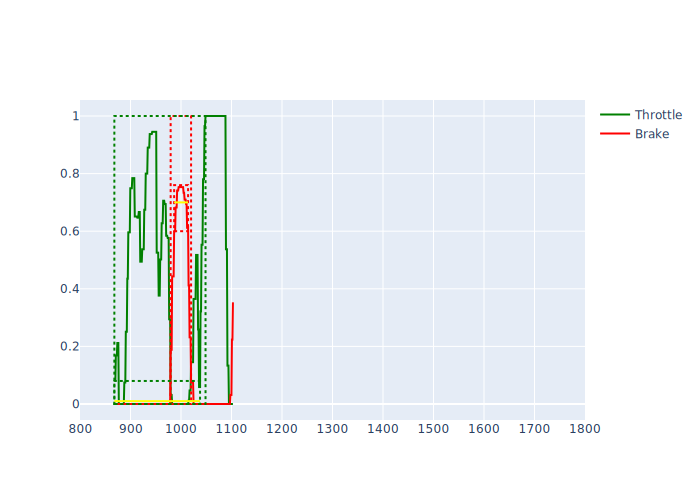

'time: 3.3697777 1104 -> 1191 / track: 9920.0'

"brake: {'start': 1104.81, 'end': 1114.67, 'max_start': 1105.79, 'max_end': 1111.71, 'max_high': 0.44, 'max_low': 0.41, 'force': 0.42, 'approach_speed': 26.48, 'min_speed': 23.95}"

"throttle: {'start': 1104.81, 'end': 1174.85, 'max_start': 1104.81, 'max_end': 1163.01, 'max_high': 0.04, 'max_low': 0.0, 'force': 0.0, 'approach_speed': 26.48, 'min_speed': 22.11}"

"gear: {'gear': 4, 'distance_gear': {1105: 5, 1147: 4}}"

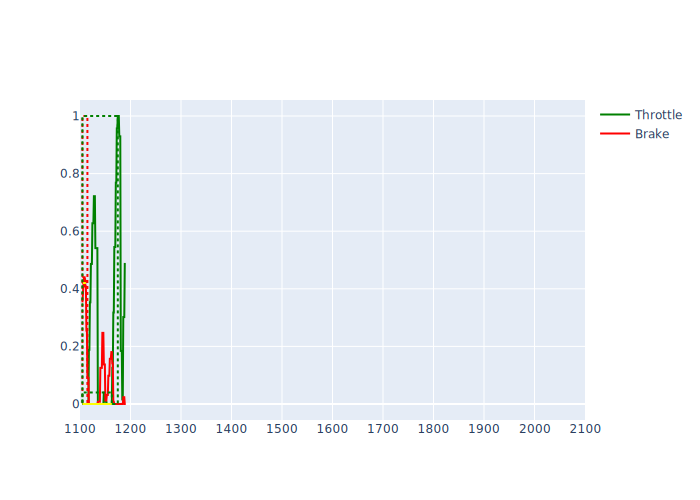

'time: 11.949790900000004 1192 -> 1519 / track: 9920.0'

"brake: {'start': 1248.85, 'end': 1279.43, 'max_start': 1254.77, 'max_end': 1274.5, 'max_high': 0.51, 'max_low': 0.46, 'force': 0.5, 'approach_speed': 27.72, 'min_speed': 18.82}"

"throttle: {'start': 1192.61, 'end': 1206.42, 'max_start': 1192.61, 'max_end': 1195.57, 'max_high': 0.39, 'max_low': 0.39, 'force': 0.39, 'approach_speed': 24.04, 'min_speed': 23.49}"

"gear: {'gear': 3, 'distance_gear': {1193: 4, 1255: 3, 1326: 4, 1367: 5, 1448: 4}}"

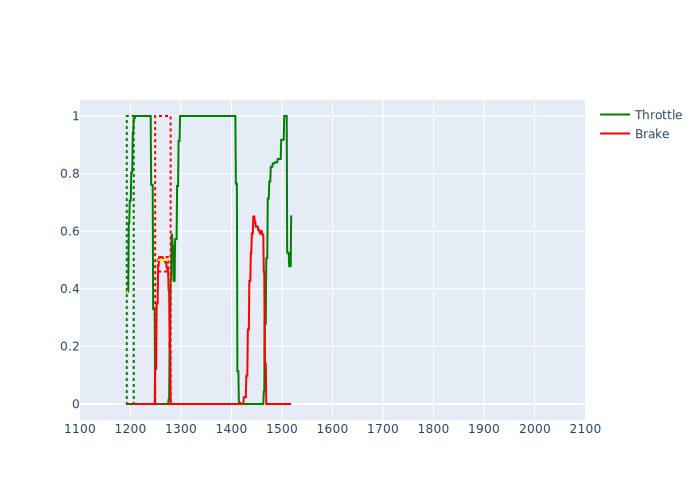

'time: 9.677288099999998 1520 -> 1813 / track: 9920.0'

"brake: {'start': 1565.54, 'end': 1577.38, 'max_start': 1565.54, 'max_end': 1574.42, 'max_high': 0.35, 'max_low': 0.22, 'force': 0.3, 'approach_speed': 28.52, 'min_speed': 26.56}"

"throttle: {'start': 1520.16, 'end': 1594.16, 'max_start': 1562.58, 'max_end': 1581.33, 'max_high': 0.02, 'max_low': 0.0, 'force': 0.0, 'approach_speed': 28.08, 'min_speed': 26.56}"

"gear: {'gear': 4, 'distance_gear': {1520: 4, 1598: 5, 1747: 4}}"

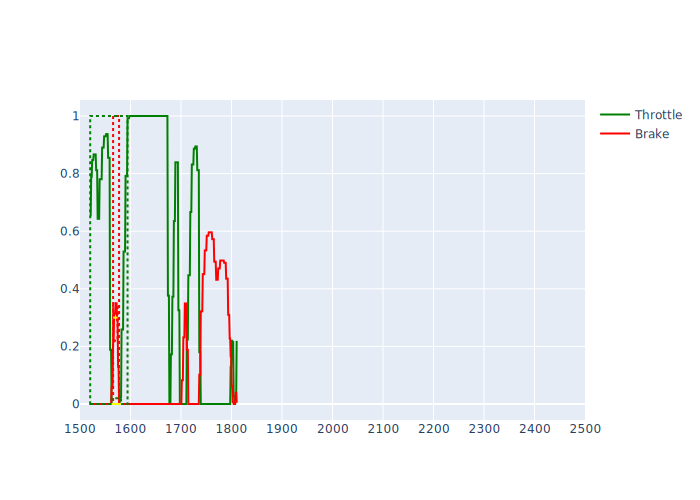

'time: 3.812960000000004 1814 -> 1920 / track: 9920.0'

"brake: {'start': 1851.66, 'end': 1855.6, 'max_start': 1851.66, 'max_end': 1854.62, 'max_high': 0.16, 'max_low': 0.15, 'force': 0.16, 'approach_speed': 26.16, 'min_speed': 25.05}"

"throttle: {'start': 1814.17, 'end': 1823.04, 'max_start': 1815.15, 'max_end': 1817.12, 'max_high': 0.67, 'max_low': 0.67, 'force': 0.67, 'approach_speed': 24.2, 'min_speed': 24.2}"

"gear: {'gear': 4, 'distance_gear': {1814: 4}}"

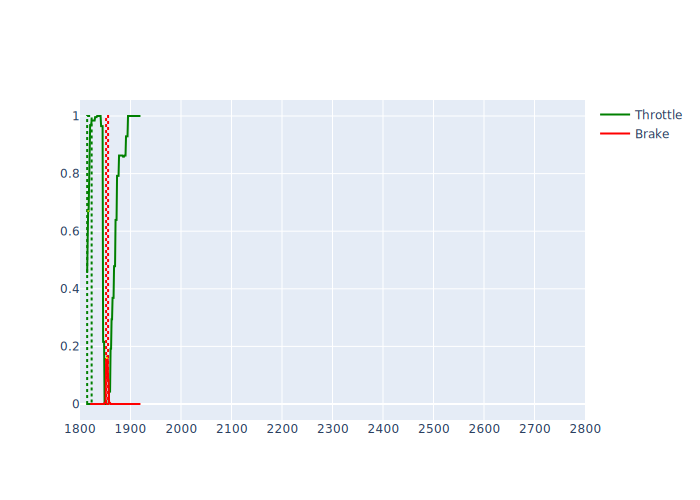

'time: 17.633195599999993 1921 -> 2329 / track: 9920.0'

"brake: {'start': 1984.85, 'end': 2003.59, 'max_start': 1987.81, 'max_end': 1995.7, 'max_high': 0.35, 'max_low': 0.34, 'force': 0.34, 'approach_speed': 32.14, 'min_speed': 29.66}"

"throttle: {'start': 1954.26, 'end': 2012.47, 'max_start': 1981.89, 'max_end': 1998.66, 'max_high': 0.05, 'max_low': 0.0, 'force': 0.02, 'approach_speed': 33.04, 'min_speed': 29.66}"

"gear: {'gear': 2, 'distance_gear': {1922: 4, 1925: 5, 2080: 4, 2135: 3, 2148: 2, 2206: 3, 2224: 4}}"

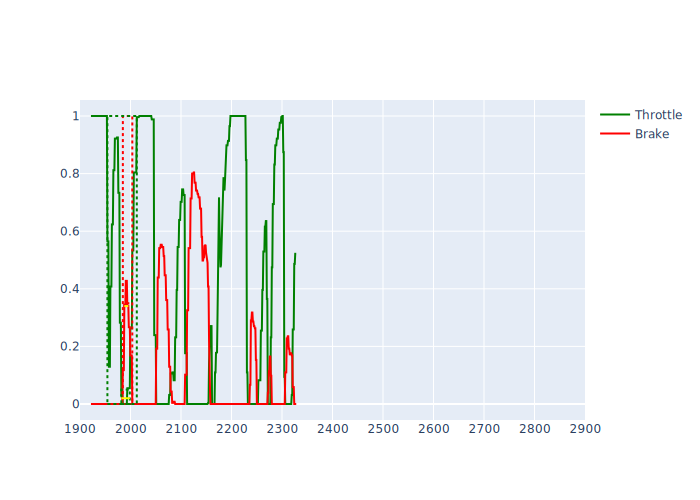

'time: 10.319702000000007 2330 -> 2573 / track: 9920.0'

"brake: {'start': 2538.32, 'end': 2567.92, 'max_start': 2542.27, 'max_end': 2564.96, 'max_high': 0.36, 'max_low': 0.24, 'force': 0.3, 'approach_speed': 30.27, 'min_speed': 25.32}"

"throttle: {'start': 2330.15, 'end': 2339.03, 'max_start': 2331.14, 'max_end': 2332.13, 'max_high': 0.45, 'max_low': 0.45, 'force': 0.45, 'approach_speed': 19.85, 'min_speed': 19.85}"

"gear: {'gear': 4, 'distance_gear': {2330: 4, 2371: 5, 2386: 4, 2498: 5, 2546: 4}}"

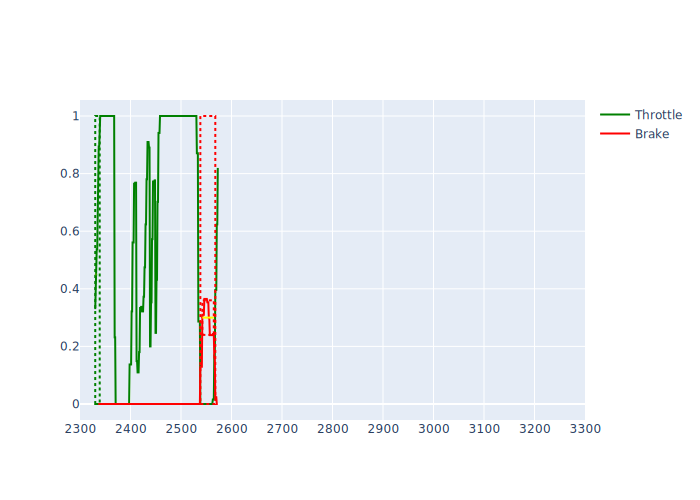

'time: 8.781288000000004 2574 -> 2779 / track: 9920.0'

"brake: {'start': 2588.64, 'end': 2630.08, 'max_start': 2588.64, 'max_end': 2629.09, 'max_high': 0.3, 'max_low': 0.18, 'force': 0.23, 'approach_speed': 25.83, 'min_speed': 20.26}"

"throttle: {'start': 2574.83, 'end': 2577.79, 'max_start': 2574.83, 'max_end': 2574.83, 'max_high': 0.82, 'max_low': 0.82, 'force': 0.82, 'approach_speed': 28.35, 'min_speed': 28.35}"

"gear: {'gear': 4, 'distance_gear': {2575: 4, 2599: 5, 2665: 4, 2774: 5}}"

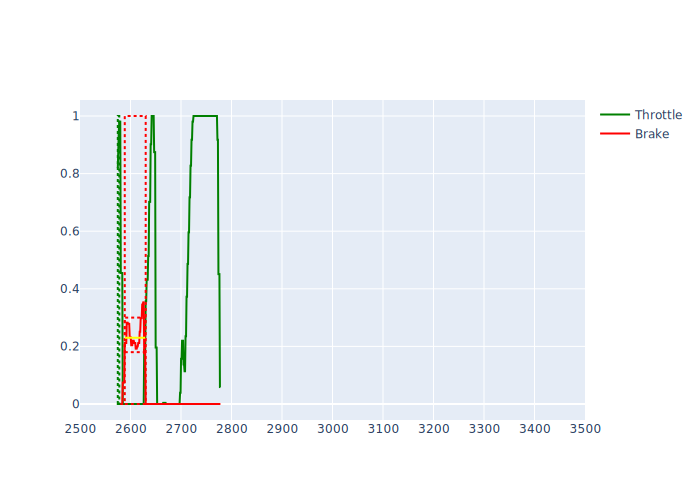

'time: 10.421074000000004 2780 -> 3009 / track: 9920.0'

"brake: {'start': 2787.93, 'end': 2819.5, 'max_start': 2794.84, 'max_end': 2810.62, 'max_high': 0.76, 'max_low': 0.61, 'force': 0.69, 'approach_speed': 26.06, 'min_speed': 8.24}"

"throttle: {'start': 2780.04, 'end': 2844.17, 'max_start': 2780.04, 'max_end': 2828.38, 'max_high': 0.0, 'max_low': 0.0, 'force': 0.0, 'approach_speed': 26.69, 'min_speed': 8.24}"

"gear: {'gear': 3, 'distance_gear': {2780: 5, 2795: 4, 2805: 3, 2888: 4, 2954: 5}}"

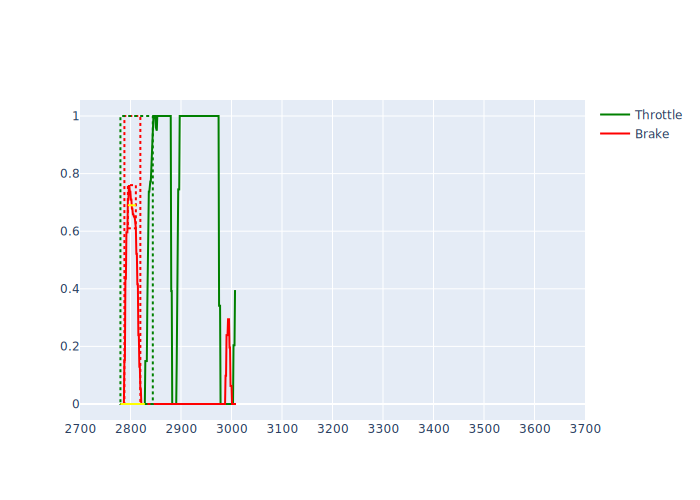

'time: 17.26106700000001 3010 -> 3383 / track: 9920.0'

"brake: {'start': 3040.5, 'end': 3068.12, 'max_start': 3044.44, 'max_end': 3065.16, 'max_high': 0.5, 'max_low': 0.45, 'force': 0.48, 'approach_speed': 29.35, 'min_speed': 25.81}"

"throttle: {'start': 3010.9, 'end': 3032.61, 'max_start': 3011.89, 'max_end': 3014.85, 'max_high': 0.45, 'max_low': 0.45, 'force': 0.45, 'approach_speed': 29.74, 'min_speed': 29.67}"

"gear: {'gear': 3, 'distance_gear': {3011: 5, 3168: 4, 3184: 3}}"

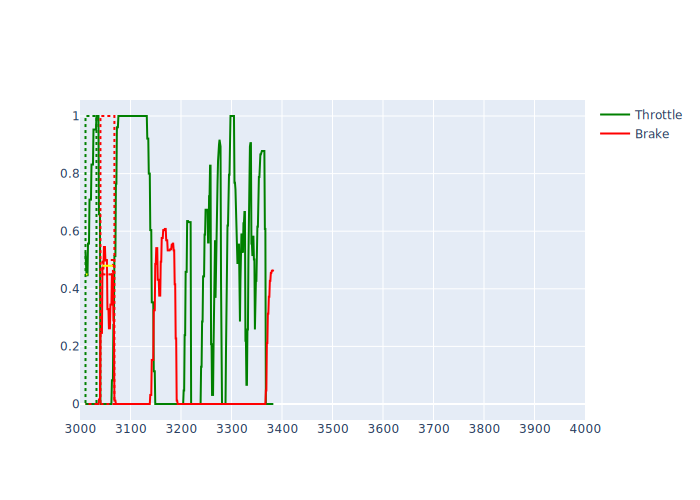

'time: 13.471711999999997 3384 -> 3546 / track: 9920.0'

"brake: {'start': 3384.82, 'end': 3388.76, 'max_start': 3384.82, 'max_end': 3387.78, 'max_high': 0.48, 'max_low': 0.34, 'force': 0.4, 'approach_speed': 6.23, 'min_speed': 5.11}"

"throttle: {'start': 3384.82, 'end': 3429.22, 'max_start': 3384.82, 'max_end': 3426.26, 'max_high': 0.09, 'max_low': 0.0, 'force': 0.01, 'approach_speed': 6.23, 'min_speed': 3.43}"

"gear: {'gear': 3, 'distance_gear': {3385: 3}}"

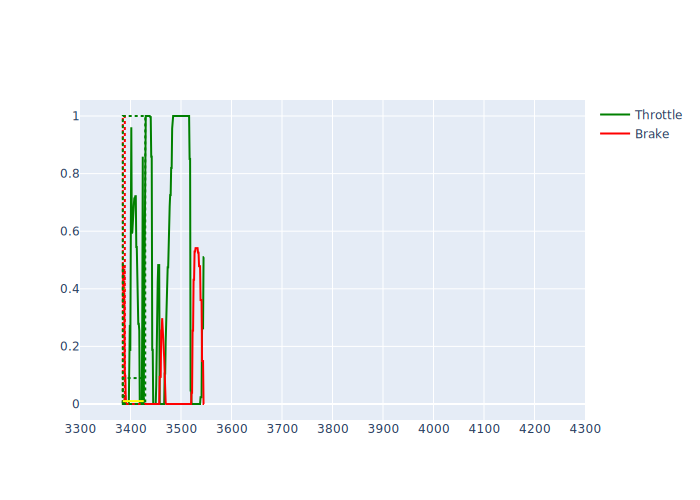

'time: 12.288666000000006 3547 -> 3817 / track: 9920.0'

"brake: {'start': 3748.87, 'end': 3770.58, 'max_start': 3748.87, 'max_end': 3765.64, 'max_high': 0.38, 'max_low': 0.2, 'force': 0.31, 'approach_speed': 25.83, 'min_speed': 19.03}"

"throttle: {'start': 3547.61, 'end': 3554.51, 'max_start': 3547.61, 'max_end': 3548.59, 'max_high': 0.75, 'max_low': 0.75, 'force': 0.75, 'approach_speed': 17.99, 'min_speed': 17.99}"

"gear: {'gear': 3, 'distance_gear': {3548: 3, 3664: 4, 3755: 3}}"

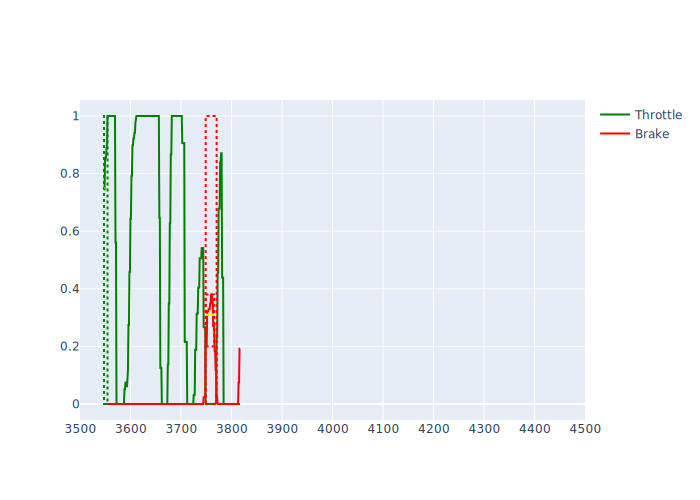

'time: 40.987930000000006 3818 -> 3908 / track: 9920.0'

"brake: {'start': 3818.92, 'end': 3840.62, 'max_start': 3818.92, 'max_end': 3837.66, 'max_high': 0.38, 'max_low': 0.22, 'force': 0.32, 'approach_speed': 20.03, 'min_speed': 7.4}"

"throttle: {'start': 3818.92, 'end': 3869.24, 'max_start': 3818.92, 'max_end': 3868.25, 'max_high': 0.0, 'max_low': 0.0, 'force': 0.0, 'approach_speed': 20.03, 'min_speed': 0.0}"

"gear: {'gear': 2, 'distance_gear': {3819: 3, 3869: 2, 3876: 3, 3905: 4}}"

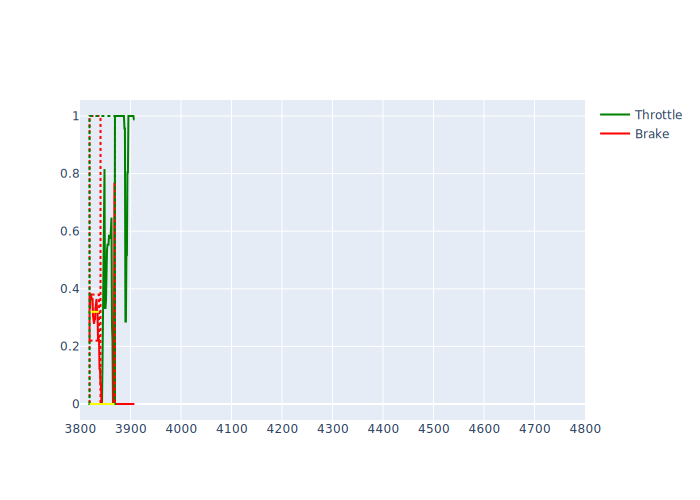

'time: 12.055389999999989 3909 -> 4150 / track: 9920.0'

"brake: {'start': 3944.22, 'end': 3958.03, 'max_start': 3946.19, 'max_end': 3955.07, 'max_high': 0.46, 'max_low': 0.3, 'force': 0.39, 'approach_speed': 22.82, 'min_speed': 17.47}"

"throttle: {'start': 3909.69, 'end': 3916.59, 'max_start': 3909.69, 'max_end': 3911.66, 'max_high': 0.89, 'max_low': 0.89, 'force': 0.89, 'approach_speed': 23.6, 'min_speed': 23.27}"

"gear: {'gear': 3, 'distance_gear': {3910: 4, 4035: 3}}"

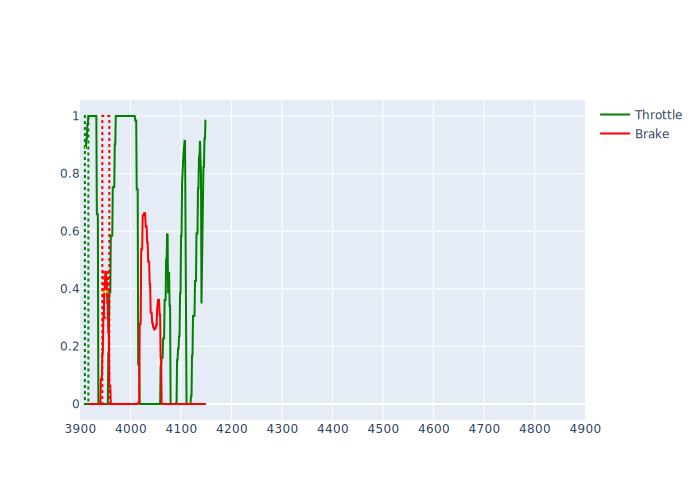

'time: 57.16409999999999 4151 -> 4681 / track: 9920.0'

"brake: {'start': 4166.2, 'end': 4181.0, 'max_start': 4168.17, 'max_end': 4178.04, 'max_high': 0.47, 'max_low': 0.33, 'force': 0.41, 'approach_speed': 18.31, 'min_speed': 6.51}"

"throttle: {'start': 4154.36, 'end': 4190.86, 'max_start': 4160.28, 'max_end': 4187.9, 'max_high': 0.0, 'max_low': 0.0, 'force': 0.0, 'approach_speed': 21.54, 'min_speed': 6.51}"

"gear: {'gear': 2, 'distance_gear': {4151: 3, 4203: 2, 4225: 3, 4311: 4, 4484: 5, 4576: 4}}"

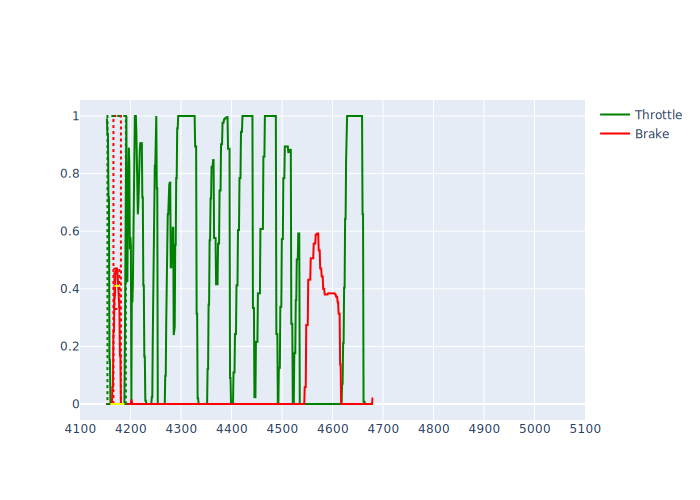

'time: 10.771178999999961 4682 -> 4926 / track: 9920.0'

"brake: {'start': 4682.19, 'end': 4696.0, 'max_start': 4682.19, 'max_end': 4695.01, 'max_high': 0.3, 'max_low': 0.11, 'force': 0.19, 'approach_speed': 21.71, 'min_speed': 18.65}"

"throttle: {'start': 4682.19, 'end': 4750.26, 'max_start': 4682.19, 'max_end': 4730.53, 'max_high': 0.06, 'max_low': 0.0, 'force': 0.0, 'approach_speed': 21.71, 'min_speed': 17.14}"

"gear: {'gear': 3, 'distance_gear': {4682: 4, 4720: 3, 4786: 4, 4880: 3}}"

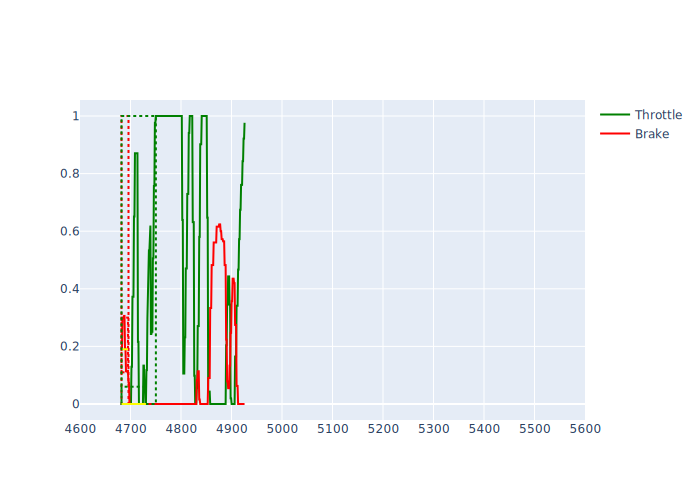

'time: 7.4014720000000125 4927 -> 5089 / track: 9920.0'

"brake: {'start': 4937.71, 'end': 4947.58, 'max_start': 4937.71, 'max_end': 4946.59, 'max_high': 0.25, 'max_low': 0.13, 'force': 0.19, 'approach_speed': 19.66, 'min_speed': 16.3}"

"throttle: {'start': 4930.81, 'end': 4967.31, 'max_start': 4933.77, 'max_end': 4946.59, 'max_high': 0.08, 'max_low': 0.0, 'force': 0.02, 'approach_speed': 22.87, 'min_speed': 16.3}"

"gear: {'gear': 3, 'distance_gear': {4928: 3, 4993: 4, 5034: 3, 5051: 4}}"

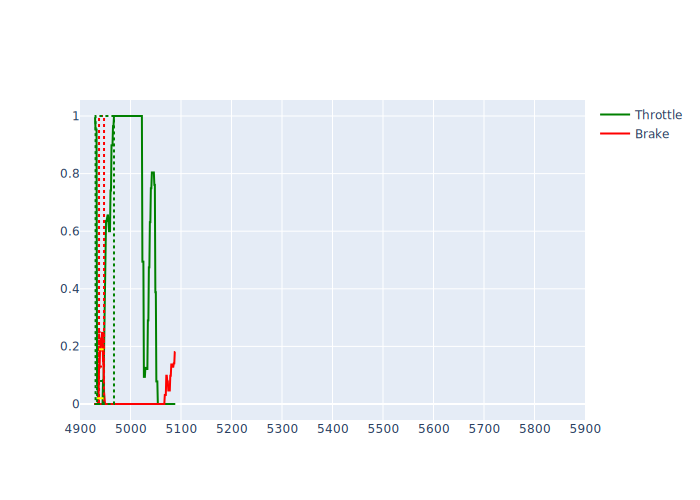

'time: 8.035675000000026 5090 -> 5241 / track: 9920.0'

"brake: {'start': 5090.64, 'end': 5095.57, 'max_start': 5090.64, 'max_end': 5094.58, 'max_high': 0.18, 'max_low': 0.13, 'force': 0.15, 'approach_speed': 17.64, 'min_speed': 15.28}"

"throttle: {'start': 5090.64, 'end': 5120.23, 'max_start': 5090.64, 'max_end': 5114.31, 'max_high': 0.0, 'max_low': 0.0, 'force': 0.0, 'approach_speed': 17.64, 'min_speed': 10.57}"

"gear: {'gear': 4, 'distance_gear': {5091: 4, 5185: 5, 5239: 4}}"

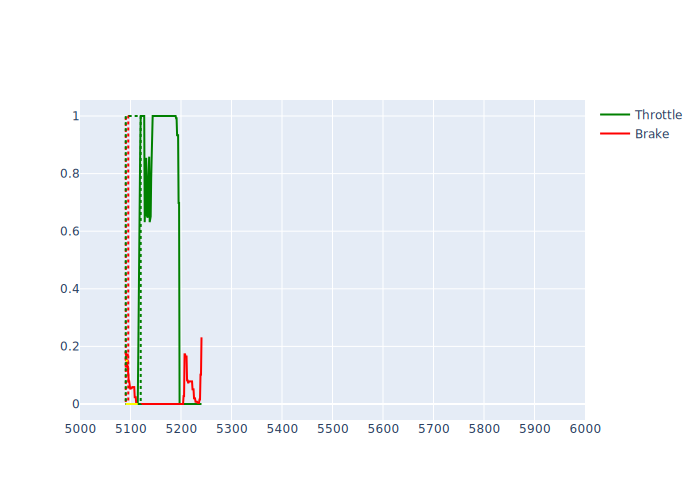

'time: 8.380829000000006 5242 -> 5426 / track: 9920.0'

"brake: {'start': 5242.57, 'end': 5253.42, 'max_start': 5243.56, 'max_end': 5246.52, 'max_high': 0.31, 'max_low': 0.3, 'force': 0.3, 'approach_speed': 17.91, 'min_speed': 8.17}"

"throttle: {'start': 5242.57, 'end': 5268.22, 'max_start': 5242.57, 'max_end': 5261.32, 'max_high': 0.06, 'max_low': 0.0, 'force': 0.01, 'approach_speed': 17.91, 'min_speed': 8.17}"

"gear: {'gear': 4, 'distance_gear': {5243: 4, 5331: 5}}"

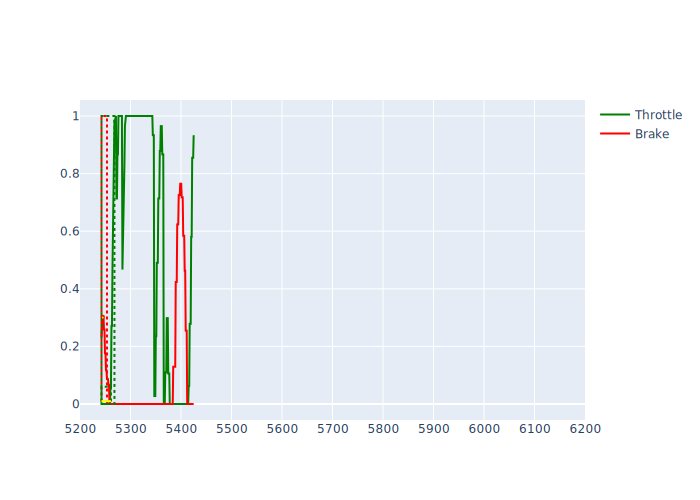

'time: 9.656462999999974 5427 -> 5709 / track: 9920.0'

"brake: {'start': 5599.72, 'end': 5647.07, 'max_start': 5612.54, 'max_end': 5630.3, 'max_high': 0.69, 'max_low': 0.62, 'force': 0.66, 'approach_speed': 34.63, 'min_speed': 24.66}"

"throttle: {'start': 5427.06, 'end': 5435.94, 'max_start': 5428.05, 'max_end': 5432.0, 'max_high': 0.89, 'max_low': 0.84, 'force': 0.87, 'approach_speed': 26.28, 'min_speed': 26.08}"

"gear: {'gear': 5, 'distance_gear': {5427: 5, 5526: 6, 5639: 5}}"

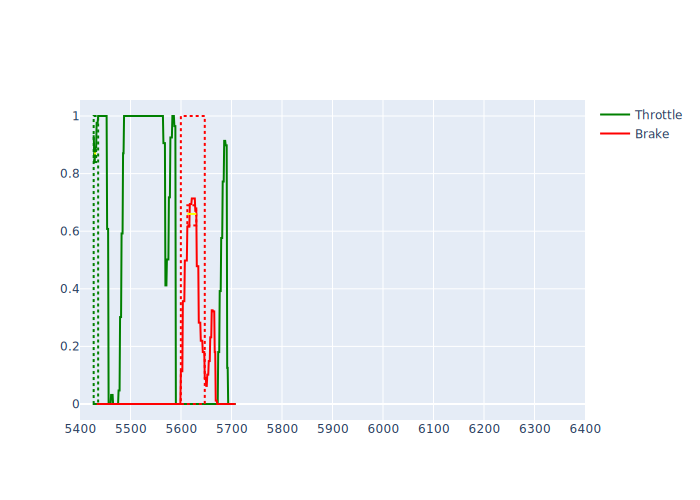

'time: 10.329547000000048 5710 -> 5982 / track: 9920.0'

"brake: {'start': 5898.65, 'end': 5959.82, 'max_start': 5898.65, 'max_end': 5958.84, 'max_high': 0.29, 'max_low': 0.11, 'force': 0.21, 'approach_speed': 31.04, 'min_speed': 22.99}"

"throttle: {'start': 5710.21, 'end': 5723.04, 'max_start': 5710.21, 'max_end': 5711.2, 'max_high': 0.0, 'max_low': 0.0, 'force': 0.0, 'approach_speed': 14.1, 'min_speed': 14.1}"

"gear: {'gear': 5, 'distance_gear': {5710: 5}}"

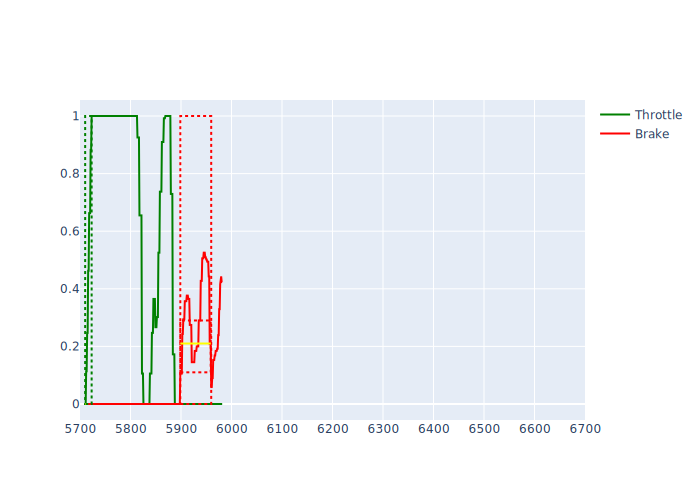

'time: 9.206682999999998 5983 -> 6152 / track: 9920.0'

"brake: {'start': 5983.5, 'end': 5991.39, 'max_start': 5984.49, 'max_end': 5990.41, 'max_high': 0.27, 'max_low': 0.18, 'force': 0.23, 'approach_speed': 11.7, 'min_speed': 11.7}"

"throttle: {'start': 5983.5, 'end': 6017.04, 'max_start': 5983.5, 'max_end': 5995.34, 'max_high': 0.0, 'max_low': 0.0, 'force': 0.0, 'approach_speed': 11.7, 'min_speed': 6.86}"

"gear: {'gear': 3, 'distance_gear': {5984: 5, 6003: 4, 6007: 3, 6061: 4}}"

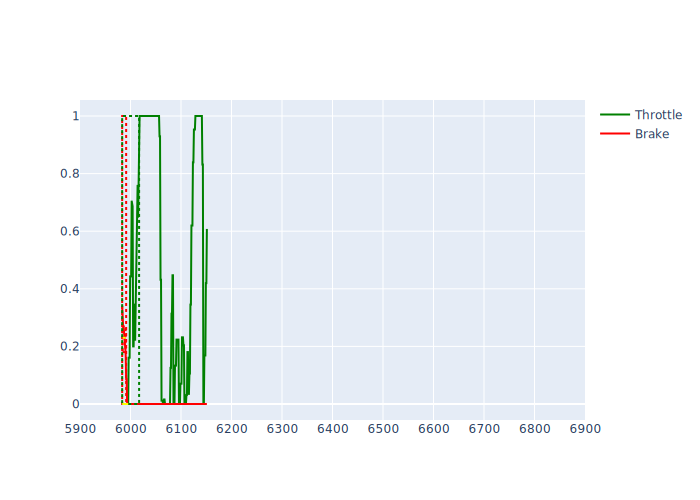

'time: 11.09814399999999 6153 -> 6435 / track: 9920.0'

"brake: {'start': 6267.64, 'end': 6300.2, 'max_start': 6273.56, 'max_end': 6282.44, 'max_high': 0.49, 'max_low': 0.46, 'force': 0.47, 'approach_speed': 30.69, 'min_speed': 26.68}"

"throttle: {'start': 6153.19, 'end': 6168.98, 'max_start': 6157.14, 'max_end': 6159.11, 'max_high': 0.39, 'max_low': 0.39, 'force': 0.39, 'approach_speed': 23.8, 'min_speed': 22.12}"

"gear: {'gear': 3, 'distance_gear': {6153: 4, 6212: 5, 6386: 4, 6393: 3}}"

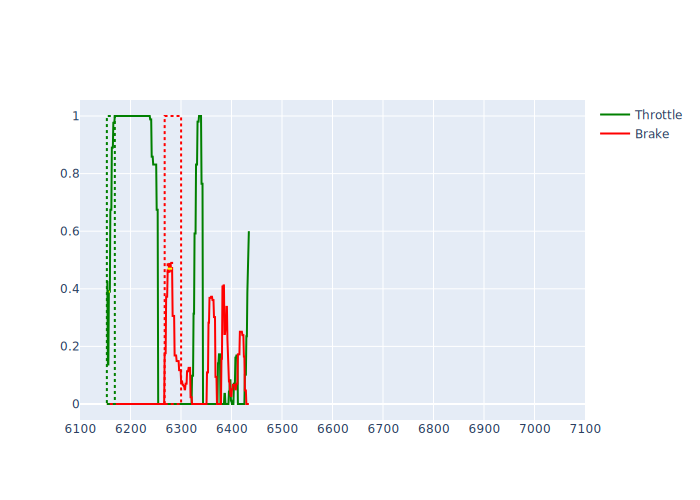

'time: 7.936836000000028 6436 -> 6599 / track: 9920.0'

"brake: {'start': 6449.17, 'end': 6451.14, 'max_start': 6449.17, 'max_end': 6450.16, 'max_high': 0.11, 'max_low': 0.11, 'force': 0.11, 'approach_speed': 14.24, 'min_speed': 14.24}"

"throttle: {'start': 6436.35, 'end': 6464.96, 'max_start': 6436.35, 'max_end': 6455.09, 'max_high': 0.6, 'max_low': 0.59, 'force': 0.6, 'approach_speed': 16.73, 'min_speed': 14.16}"

"gear: {'gear': 3, 'distance_gear': {6436: 3, 6496: 4}}"

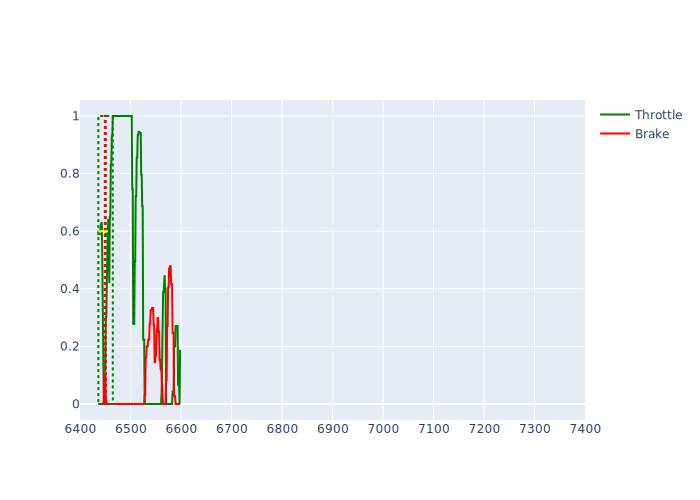

'time: 7.165161000000012 6600 -> 6741 / track: 9920.0'

"brake: {'start': 6708.65, 'end': 6739.23, 'max_start': 6712.59, 'max_end': 6738.24, 'max_high': 0.49, 'max_low': 0.32, 'force': 0.43, 'approach_speed': 22.62, 'min_speed': 10.44}"

"throttle: {'start': 6600.12, 'end': 6616.89, 'max_start': 6604.07, 'max_end': 6611.96, 'max_high': 0.15, 'max_low': 0.11, 'force': 0.12, 'approach_speed': 13.98, 'min_speed': 9.72}"

"gear: {'gear': 3, 'distance_gear': {6600: 4, 6662: 5, 6722: 4, 6734: 3}}"

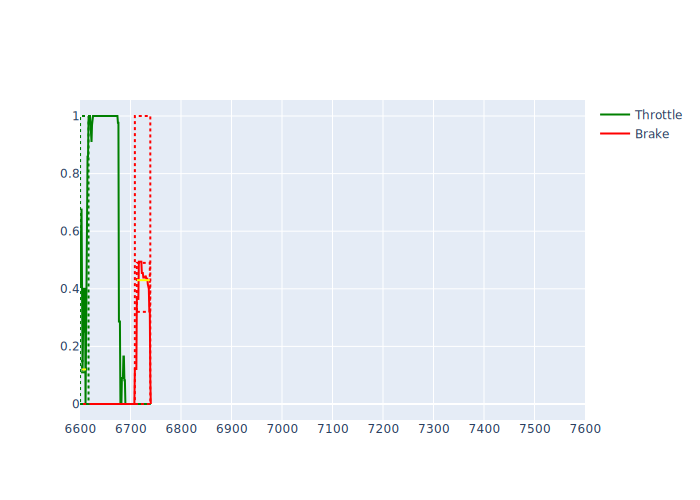

'time: 6.627716000000021 6742 -> 6855 / track: 9920.0'

"brake: {'start': 6828.02, 'end': 6854.66, 'max_start': 6830.98, 'max_end': 6854.66, 'max_high': 0.49, 'max_low': 0.34, 'force': 0.41, 'approach_speed': 24.49, 'min_speed': 15.56}"

"throttle: {'start': 6742.19, 'end': 6756.99, 'max_start': 6747.12, 'max_end': 6752.06, 'max_high': 0.1, 'max_low': 0.01, 'force': 0.07, 'approach_speed': 5.45, 'min_speed': 4.69}"

"gear: {'gear': 3, 'distance_gear': {6742: 3, 6786: 4}}"

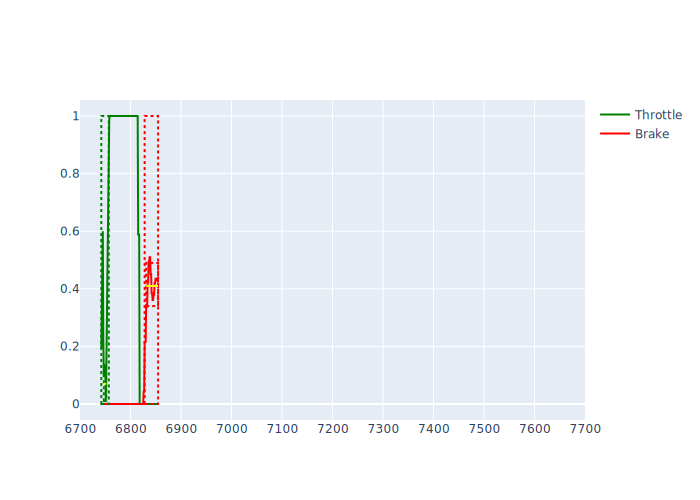

'time: 4.47144499999996 6856 -> 6950 / track: 9920.0'

"brake: {'start': 6856.63, 'end': 6865.51, 'max_start': 6856.63, 'max_end': 6859.59, 'max_high': 0.42, 'max_low': 0.41, 'force': 0.41, 'approach_speed': 14.6, 'min_speed': 13.06}"

"throttle: {'start': 6856.63, 'end': 6880.31, 'max_start': 6856.63, 'max_end': 6872.42, 'max_high': 0.09, 'max_low': 0.0, 'force': 0.02, 'approach_speed': 14.6, 'min_speed': 12.18}"

"gear: {'gear': 3, 'distance_gear': {6857: 4, 6868: 3}}"

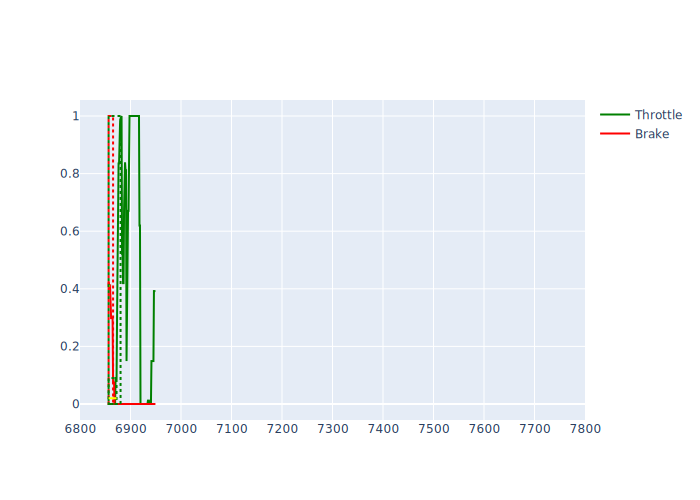

'time: 3.803314999999998 6951 -> 7030 / track: 9920.0'

'brake: {}'

"throttle: {'start': 6951.35, 'end': 6969.11, 'max_start': 6954.31, 'max_end': 6956.28, 'max_high': 0.1, 'max_low': 0.1, 'force': 0.1, 'approach_speed': 18.88, 'min_speed': 17.62}"

"gear: {'gear': 3, 'distance_gear': {6951: 3, 6990: 4}}"

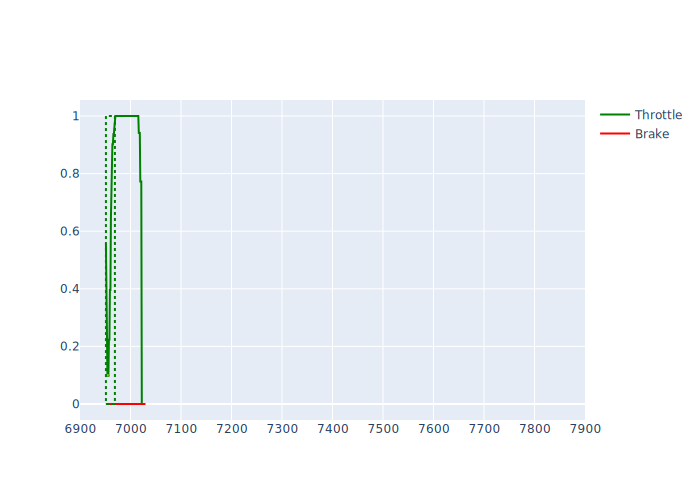

'time: 7.070403999999996 7031 -> 7233 / track: 9920.0'

"brake: {'start': 7155.57, 'end': 7214.77, 'max_start': 7163.46, 'max_end': 7180.24, 'max_high': 0.66, 'max_low': 0.61, 'force': 0.63, 'approach_speed': 32.44, 'min_speed': 20.29}"

"throttle: {'start': 7031.26, 'end': 7050.01, 'max_start': 7031.26, 'max_end': 7037.18, 'max_high': 0.09, 'max_low': 0.0, 'force': 0.04, 'approach_speed': 27.51, 'min_speed': 27.26}"

"gear: {'gear': 3, 'distance_gear': {7031: 4, 7096: 5, 7163: 4, 7195: 3}}"

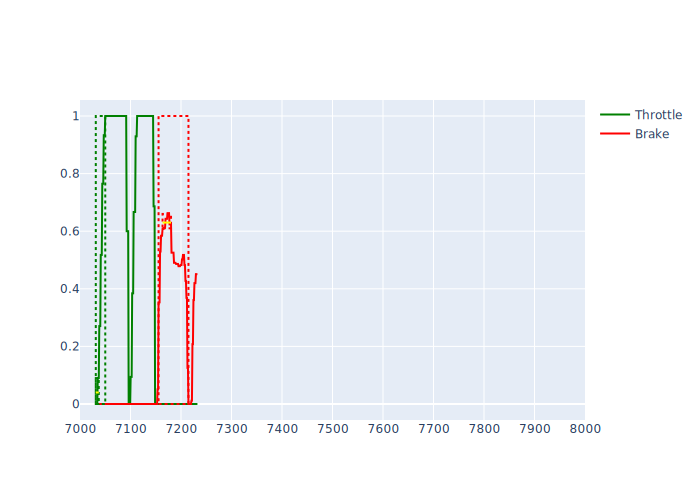

'time: 12.953735000000052 7234 -> 7436 / track: 9920.0'

"brake: {'start': 7234.5, 'end': 7240.42, 'max_start': 7234.5, 'max_end': 7236.47, 'max_high': 0.42, 'max_low': 0.42, 'force': 0.42, 'approach_speed': 12.14, 'min_speed': 12.14}"

"throttle: {'start': 7234.5, 'end': 7251.27, 'max_start': 7234.5, 'max_end': 7245.35, 'max_high': 0.09, 'max_low': 0.0, 'force': 0.02, 'approach_speed': 12.14, 'min_speed': 12.14}"

"gear: {'gear': 3, 'distance_gear': {7234: 3, 7287: 4}}"

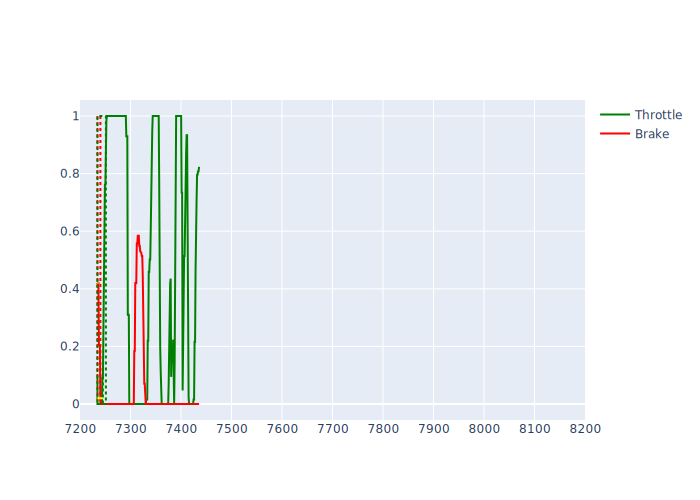

'time: 13.383159000000035 7437 -> 7667 / track: 9920.0'

"brake: {'start': 7598.55, 'end': 7620.26, 'max_start': 7598.55, 'max_end': 7619.27, 'max_high': 0.24, 'max_low': 0.1, 'force': 0.19, 'approach_speed': 24.25, 'min_speed': 18.98}"

"throttle: {'start': 7437.74, 'end': 7439.71, 'max_start': 7437.74, 'max_end': 7437.74, 'max_high': 0.86, 'max_low': 0.86, 'force': 0.86, 'approach_speed': 16.91, 'min_speed': 16.91}"

"gear: {'gear': 3, 'distance_gear': {7438: 4, 7454: 3, 7556: 4, 7608: 3}}"

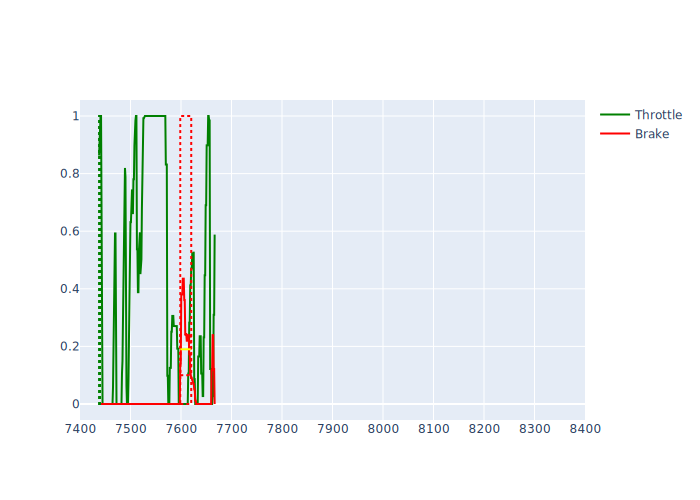

'time: 9.336394999999982 7668 -> 7906 / track: 9920.0'

"brake: {'start': 7794.88, 'end': 7842.24, 'max_start': 7806.72, 'max_end': 7814.61, 'max_high': 0.54, 'max_low': 0.52, 'force': 0.53, 'approach_speed': 28.67, 'min_speed': 19.71}"

"throttle: {'start': 7668.6, 'end': 7670.57, 'max_start': 7668.6, 'max_end': 7669.59, 'max_high': 0.88, 'max_low': 0.88, 'force': 0.88, 'approach_speed': 21.61, 'min_speed': 21.61}"

"gear: {'gear': 3, 'distance_gear': {7669: 3, 7708: 4, 7816: 3, 7857: 4, 7889: 3}}"

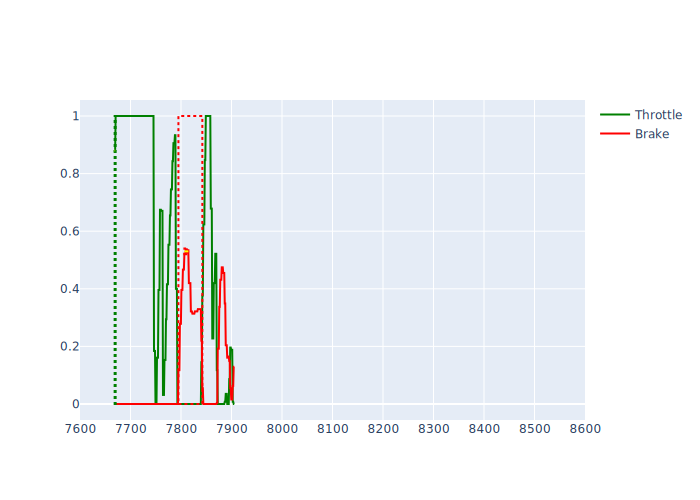

'time: 6.6240999999999985 7907 -> 8078 / track: 9920.0'

"brake: {'start': 7907.35, 'end': 7912.29, 'max_start': 7907.35, 'max_end': 7911.3, 'max_high': 0.21, 'max_low': 0.11, 'force': 0.17, 'approach_speed': 15.87, 'min_speed': 15.2}"

"throttle: {'start': 7907.35, 'end': 7924.13, 'max_start': 7912.29, 'max_end': 7921.17, 'max_high': 0.46, 'max_low': 0.45, 'force': 0.46, 'approach_speed': 15.87, 'min_speed': 15.2}"

"gear: {'gear': 3, 'distance_gear': {7907: 3, 7958: 4, 8005: 5}}"

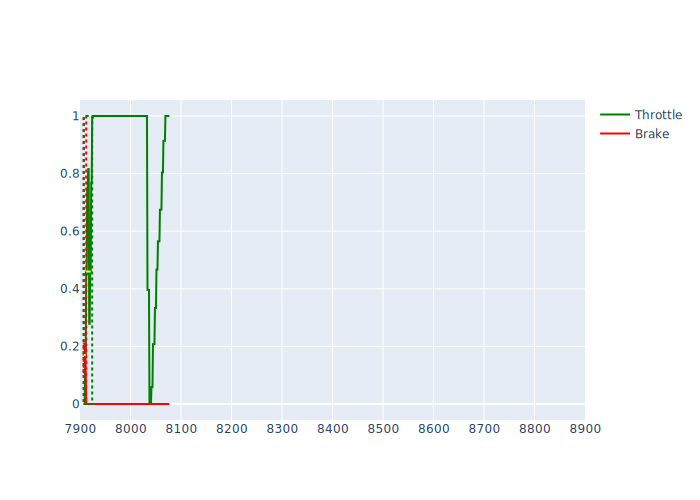

'time: 19.462034000000017 8079 -> 8527 / track: 9920.0'

"brake: {'start': 8149.07, 'end': 8164.85, 'max_start': 8152.03, 'max_end': 8160.91, 'max_high': 0.37, 'max_low': 0.32, 'force': 0.36, 'approach_speed': 35.95, 'min_speed': 33.81}"

"throttle: {'start': 8142.16, 'end': 8183.6, 'max_start': 8146.11, 'max_end': 8160.91, 'max_high': 0.04, 'max_low': 0.0, 'force': 0.01, 'approach_speed': 39.92, 'min_speed': 33.81}"

"gear: {'gear': 3, 'distance_gear': {8079: 5, 8142: 6, 8307: 5, 8321: 4, 8330: 3}}"

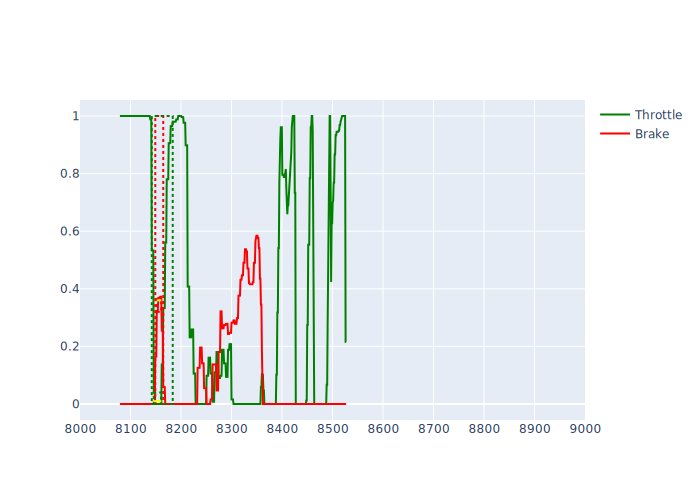

'time: 12.295817 8528 -> 8756 / track: 9920.0'

"brake: {'start': 8532.85, 'end': 8540.75, 'max_start': 8534.83, 'max_end': 8538.77, 'max_high': 0.37, 'max_low': 0.34, 'force': 0.36, 'approach_speed': 18.94, 'min_speed': 16.88}"

"throttle: {'start': 8528.91, 'end': 8568.37, 'max_start': 8528.91, 'max_end': 8557.52, 'max_high': 0.09, 'max_low': 0.0, 'force': 0.01, 'approach_speed': 19.81, 'min_speed': 14.84}"

"gear: {'gear': 3, 'distance_gear': {8529: 3, 8629: 4, 8681: 5, 8744: 4, 8746: 3}}"

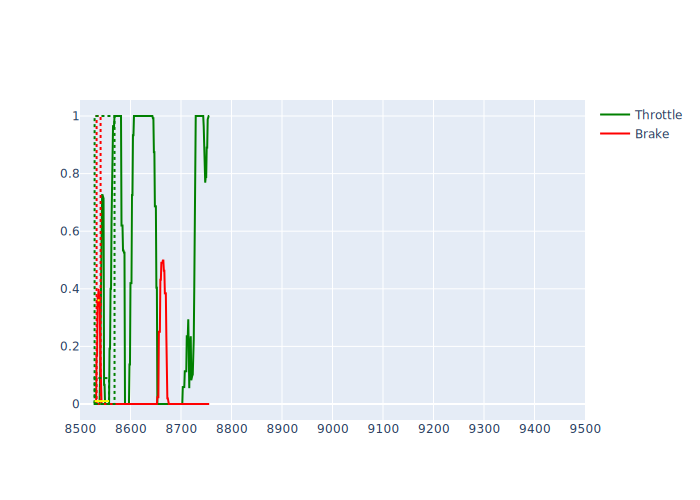

'time: 8.15670799999998 8757 -> 8917 / track: 9920.0'

"brake: {'start': 8833.76, 'end': 8843.63, 'max_start': 8833.76, 'max_end': 8842.64, 'max_high': 0.24, 'max_low': 0.11, 'force': 0.19, 'approach_speed': 21.68, 'min_speed': 20.29}"

"throttle: {'start': 8766.67, 'end': 8786.41, 'max_start': 8769.63, 'max_end': 8777.53, 'max_high': 0.02, 'max_low': 0.0, 'force': 0.01, 'approach_speed': 20.31, 'min_speed': 17.38}"

"gear: {'gear': 3, 'distance_gear': {8758: 3, 8814: 4, 8827: 3}}"

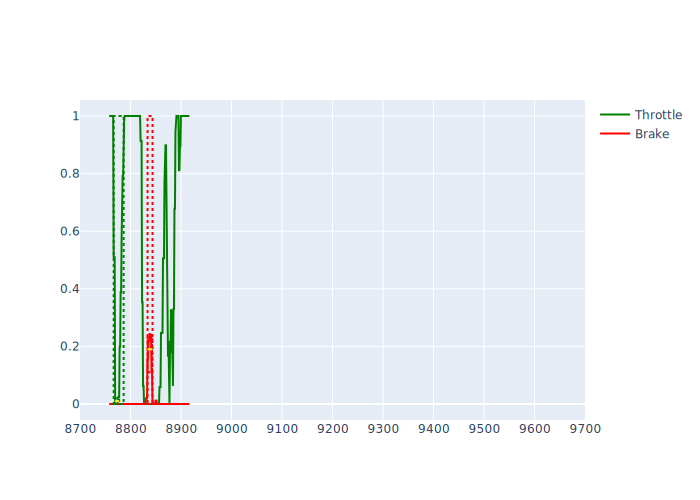

'time: 16.423655999999994 8918 -> 9151 / track: 9920.0'

"brake: {'start': 8992.6, 'end': 9017.27, 'max_start': 8992.6, 'max_end': 9013.32, 'max_high': 0.36, 'max_low': 0.23, 'force': 0.29, 'approach_speed': 27.96, 'min_speed': 23.74}"

"throttle: {'start': 8975.83, 'end': 9131.71, 'max_start': 8980.76, 'max_end': 9124.81, 'max_high': 0.0, 'max_low': 0.0, 'force': 0.0, 'approach_speed': 30.68, 'min_speed': 11.2}"

"gear: {'gear': 2, 'distance_gear': {8919: 3, 8931: 4, 8956: 5, 9101: 4, 9145: 2}}"

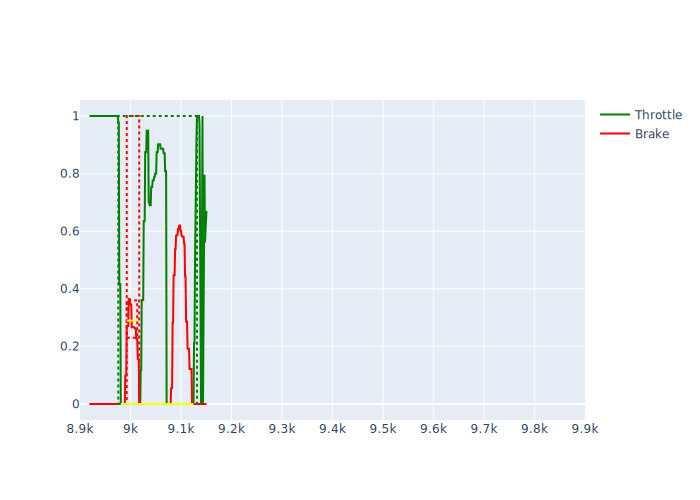

'time: 4.125621000000024 9152 -> 9236 / track: 9920.0'

'brake: {}'

"throttle: {'start': 9152.43, 'end': 9153.42, 'max_start': 9152.43, 'max_end': 9153.42, 'max_high': 1.0, 'max_low': 0.95, 'force': 0.98, 'approach_speed': 13.55, 'min_speed': 13.55}"

"gear: {'gear': 2, 'distance_gear': {9152: 2, 9165: 3}}"

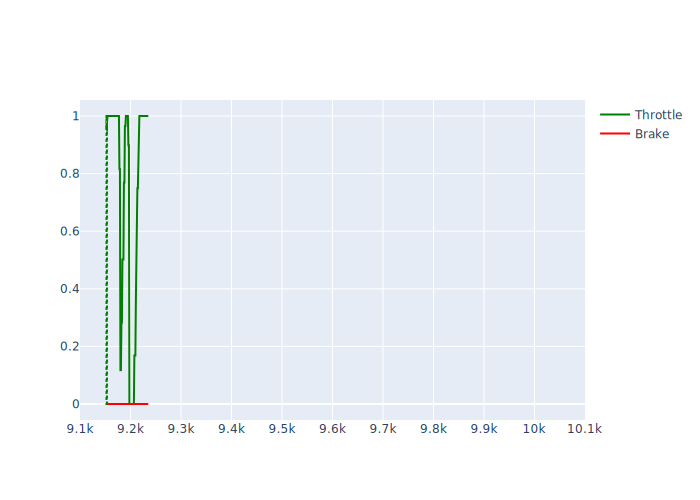

'time: 9.56189999999998 9237 -> 9430 / track: 9920.0'

"brake: {'start': 9295.49, 'end': 9341.86, 'max_start': 9297.46, 'max_end': 9338.9, 'max_high': 0.5, 'max_low': 0.38, 'force': 0.47, 'approach_speed': 26.68, 'min_speed': 15.85}"

"throttle: {'start': 9278.72, 'end': 9391.19, 'max_start': 9281.68, 'max_end': 9376.39, 'max_high': 0.04, 'max_low': 0.0, 'force': 0.0, 'approach_speed': 29.91, 'min_speed': 5.29}"

"gear: {'gear': 2, 'distance_gear': {9237: 3, 9253: 4, 9305: 3, 9368: 2, 9409: 3}}"

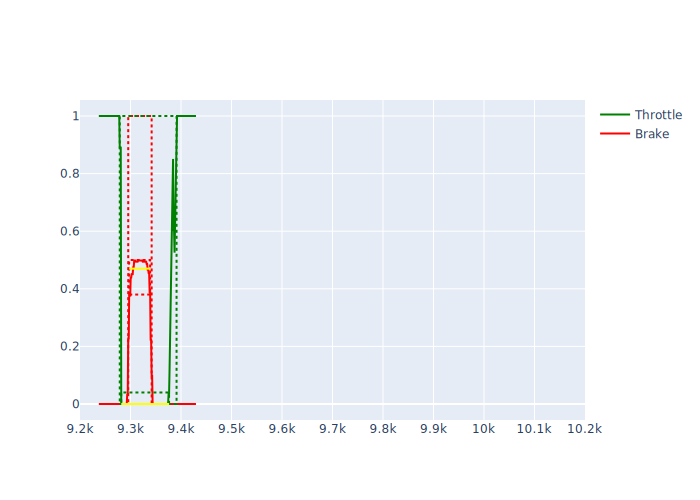

'time: 6.199187999999992 9431 -> 9585 / track: 9920.0'

"brake: {'start': 9502.67, 'end': 9534.24, 'max_start': 9504.65, 'max_end': 9516.48, 'max_high': 0.46, 'max_low': 0.41, 'force': 0.44, 'approach_speed': 29.38, 'min_speed': 22.75}"

"throttle: {'start': 9486.89, 'end': 9584.56, 'max_start': 9491.82, 'max_end': 9576.67, 'max_high': 0.06, 'max_low': 0.0, 'force': 0.01, 'approach_speed': 32.29, 'min_speed': 21.04}"

"gear: {'gear': 3, 'distance_gear': {9432: 3, 9438: 4, 9466: 5, 9516: 4}}"

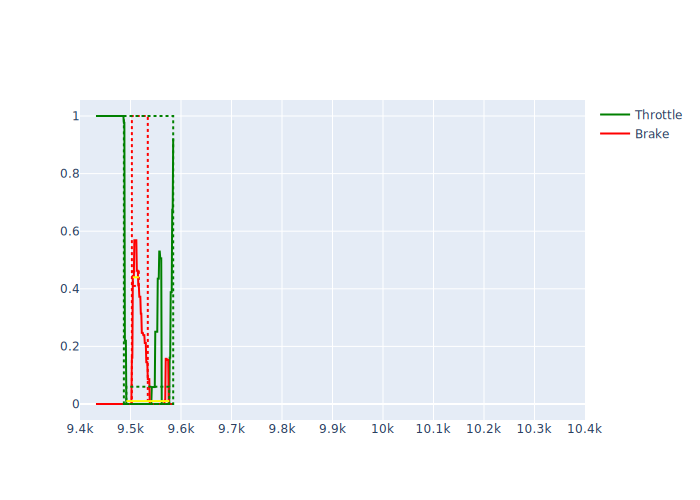

'time: 9.537399999999991 9586 -> 9920 / track: 9920.0'

"brake: {'start': 9704.92, 'end': 9721.7, 'max_start': 9708.87, 'max_end': 9714.79, 'max_high': 0.33, 'max_low': 0.32, 'force': 0.32, 'approach_speed': 31.88, 'min_speed': 30.43}"

"throttle: {'start': 9614.16, 'end': 9621.06, 'max_start': 9614.16, 'max_end': 9617.12, 'max_high': 0.79, 'max_low': 0.79, 'force': 0.79, 'approach_speed': 27.28, 'min_speed': 27.28}"

"gear: {'gear': 1, 'distance_gear': {9587: 4, 9637: 5, 9754: 4, 9846: 3, 9891: 2, 9899: 1}}"

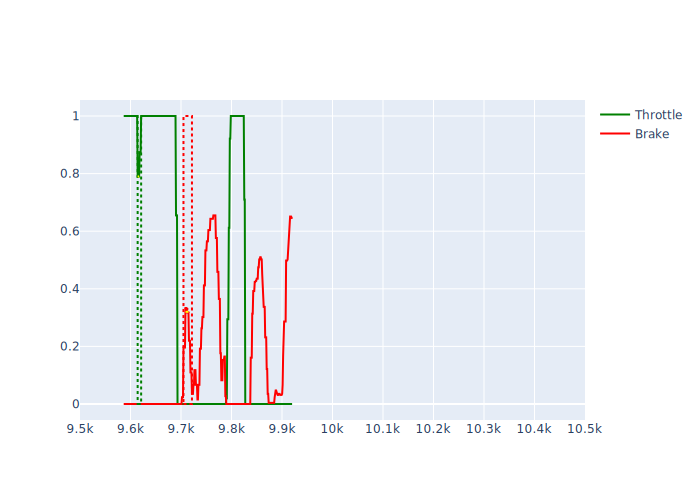

In [6]:
segments, used_laps = fast_lap_analyzer.extract_segments(sector_start_end, data_frames, laps_with_telemetry, df_max)
track_length = df_max["DistanceRoundTrack"].max()
for i in range(len(segments)):
    segment = segments[i]
    # display(segment.start, segment.end, segment.turn)
    # display(segment.telemetry)
    # df = telemetry_for_fig(segment)
    df = segment.telemetry
    fig = lap_fig(df, columns=["Throttle", "Brake"])
    brake_features = segment.brake_features()
    if brake_features:
        # brake_features = features_for_fig(segment, track_length, brake_features)
        fig_add_features(fig, brake_features)
    throttle_features = segment.throttle_features()
    if throttle_features:
        # throttle_features = features_for_fig(segment, track_length, throttle_features)
        fig_add_features(fig, throttle_features, color="green")
    display(f"time: {segment.time} {segment.start} -> {segment.end} / track: {segment.track_length}")
    display(f"brake: {segment.brake_features()}")
    display(f"throttle: {segment.throttle_features()}")
    display(f"gear: {segment.gear_features()}")
    fig.show()